## Course Policies

### 1. List the communication channels available to you in this course.


#### 1. email
#### 2. Canvas mail
#### 3. Slack

### 2. Are late assignments acceptable?

#### It should be accepted if a student is not able to submit it due to some emergency and he/she communicates it before the deadline.

### 3. What to do if you feel that an assignment needs to be re-graded?

#### I will reach out to Jackson Cornell and will try to understand his point of view. If I am not satisfied with the answer, I will connect with Dr. Catia Silva for a better understanding of it.

### 4. What constitutes healthy collaboration and when to cite another student?

#### According to me, healthy collaboration is to be able to recognize the work done by each individual without any biases. Citation of others’ work is necessary If I am using the work of others as a reference and building or something on it. 

### 5. If you have additional comments, please feel free to add them as well.

#### My submission for this assignment is because I switched to this course on August 30th night. Even though the fault is on my end, I hope you can be a bit lenient in the late submission penalty.

# Assignment 0

In [1]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## UF Dataset

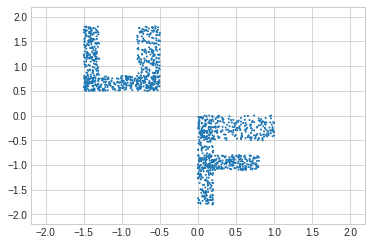

In [3]:
UF_data = np.load('UF_data.npy')
#print(UF_data)
feature_1= UF_data[:, 0]
feature_2 = UF_data[:,1]

#colors=feature_2
target = UF_data[:,2]

plt.scatter(feature_1, feature_2,s=target, cmap='viridis')

plt.show()

## Computer Hardware Dataset

In [4]:
df = pd.read_csv('computer_hardware.csv')

In [5]:
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,RP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [6]:
scaler = MinMaxScaler()
df[df.columns]= scaler.fit_transform(df)
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,RP
0,0.072825,0.006012,0.092843,1.000,0.307692,0.727273,0.167832
1,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.229895
2,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.187063
3,0.008092,0.248497,0.499499,0.125,0.153846,0.181818,0.145105
4,0.008092,0.248497,0.249249,0.125,0.153846,0.090909,0.110140


array([[<AxesSubplot:xlabel='MYCT', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CACH', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='RP', ylabel='MYCT'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CACH', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='RP', ylabel='MMIN'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMAX'>,
        <AxesSubplot:xlabel='CACH', ylabel='MMAX'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MMAX'>,
        <

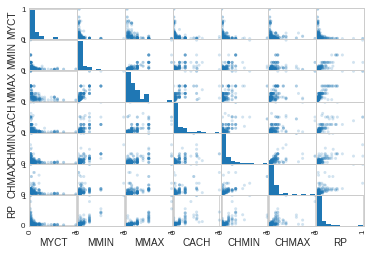

In [7]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [8]:
df.corr(method='pearson')

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,RP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
RP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


#### **MMAX** has the largest predictive value to predict the dependent variable

In [9]:
x=df['MMAX']
y = df['RP']
slope, intercept, r, p, se = stats.linregress(x, y)
print("slope is:",slope)
print("intercept is:",intercept)

slope is: 0.6615010812649373
intercept is: -0.03430220768472374


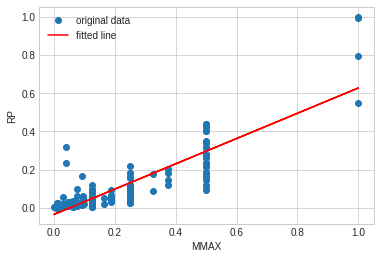

In [10]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("MMAX")
plt.ylabel("RP")
plt.legend()
plt.show()